<a href="https://colab.research.google.com/github/Kuldeep995/Machine_Learning/blob/master/1801093MLassignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Implementing the SLP for the OR and AND Problem

AND PROBLEM
Learning Rate: 0.100000
Weight: [-0.20000000000000004, 0.19999999999999998, 0.09999999999999998] 

Learning Rate: 0.200000
Weight: [-0.30000000000000004, 0.3, 0.09999999999999998] 

Learning Rate: 0.400000
Weight: [-0.9, 0.7, 0.29999999999999993] 

Learning Rate: 0.500000
Weight: [-1.7, 1.3, 0.8] 

Learning Rate: 0.800000
Weight: [-0.5, 0.3, 0.3] 

Learning Rate: 0.900000
Weight: [-2.4, 1.2000000000000002, 1.2] 



OR PROBLEM
Learning Rate: 0.100000
Weight: [-2.7755575615628914e-17, 0.3, 0.3] 

Learning Rate: 0.200000
Weight: [-0.10000000000000003, 0.3, 0.3] 

Learning Rate: 0.400000
Weight: [-0.10000000000000003, 0.3, 0.3] 

Learning Rate: 0.500000
Weight: [-0.2, 0.3, 0.3] 

Learning Rate: 0.800000
Weight: [-0.5, 1.1, 1.1] 

Learning Rate: 0.900000
Weight: [-0.6000000000000001, 1.2, 1.2] 



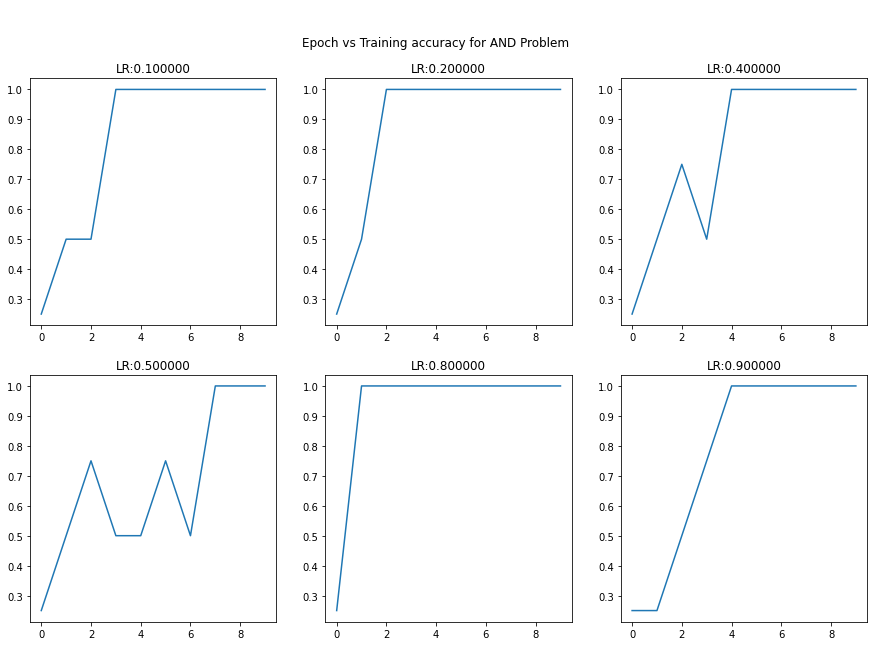

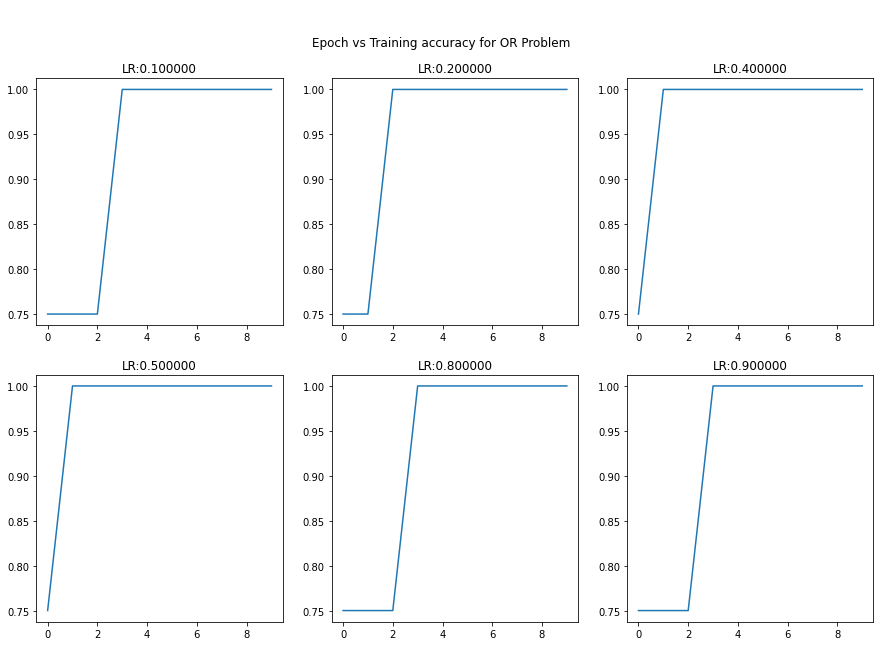

In [ ]:
import matplotlib,sys
from matplotlib import pyplot as plt
import numpy as np

def threshold(activa):
    return 1.0 if activa>=0.0 else 0.0

def predict(input,weight):
	activa=0.0
	for i,w in zip(input,weight):
		activa += i*w 
	return threshold(activa)

def accuracy(matrix,weight):
	num_correct = 0.0
	preds       = []
	for i in range(len(matrix)):
		pred   = predict(matrix[i][:-1],weight) 
		preds.append(pred)
		if pred==matrix[i][-1]: num_correct+=1.0 
	return num_correct/float(len(matrix))

def train_weight(matrix,weight,nb_epoch=10,l_rate=1.0):
	trainPlot = []
	for epoch in range(nb_epoch):
		cur_acc = accuracy(matrix,weight)
		if(epoch==9):
			print("Weight:",weight,"\n")
		trainPlot.append(cur_acc)
		
		for i in range(len(matrix)):
			prediction = predict(matrix[i][:-1],weight) 
			error      = matrix[i][-1]-prediction		 
	
			for j in range(len(weight)): 				 		
				weight[j] = weight[j]+(l_rate*error*matrix[i][j]) 

	return trainPlot 

def main(AND):

	nb_epoch		= 10
	l_rate  		= [0.1,0.2,0.4,0.5,0.8,0.9]
	ANDBool = AND
	if ANDBool: title = 'AND Problem'
	else: title = 'OR Problem'
	fig, axs = plt.subplots(2, 3,figsize=(15,10))
	fig.suptitle('\n\nEpoch vs Training accuracy for '+title)

	for rate in range(6):
		l_rate_curr = l_rate[rate]
							
		matrixOR = [[1.00,	0.0,	0.0,	0.0],
					[1.00,	0.0,	1.0,	1.0],
					[1.00,	1.0,	0.0,	1.0],
					[1.00,	1.0,	1.0,	1.0]]
		matrixAND = [[1.00,	0.0,	0.0,	0.0],
					[1.00,	0.0,	1.0,	0.0],
					[1.00,	1.0,	0.0,	0.0],
					[1.00,	1.0,	1.0,	1.0]]
		if ANDBool: matrix = matrixAND 
		else: matrix = matrixOR
		weight= [	 0.30,	0.30,  0.30		] 
		print("Learning Rate: %f"%(l_rate_curr))
		trainPlot = train_weight(matrix,weight=weight,nb_epoch=nb_epoch,l_rate=l_rate_curr)
		axs[rate//3][rate%3].plot(trainPlot)
		axs[rate//3][rate%3].set_title('LR:%f'%(l_rate_curr))

if __name__ == '__main__':
	print("AND PROBLEM")
	main(AND=True)
	print("\n\nOR PROBLEM")
	main(AND=False)

2. Implementing Bayes Classifier

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
class NaiveBayesClassifier(object):
    
    def __init__(self):
        pass

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
        self.no_of_classes = 2
   
    def euclidianDistance(self, Xtest, Xtrain):
        return np.sqrt(np.sum(np.power((Xtest - Xtrain), 2)))

    def predict(self, X, radius=200):   
        pred = []

        members_of_class = []
        for i in range(self.no_of_classes):
            counter = 0
            for j in range(len(self.y_train)):
                if self.y_train[j] == i:
                    counter += 1
            members_of_class.append(counter)
        

        for t in range(len(X)):
            prob_of_classes = []
            for i in range(self.no_of_classes):

                prior_prob = members_of_class[i]/len(self.y_train) 
                inRadius_no = 0
                inRadius_no_current_class = 0
                
                for j in range(len(self.X_train)):
                    if self.euclidianDistance(X[t], self.X_train[j]) < radius:
                        inRadius_no += 1
                        if self.y_train[j] == i:
                            inRadius_no_current_class += 1
                margin_prob = inRadius_no/len(self.X_train)
                likelihood = inRadius_no_current_class/len(self.X_train)
                post_prob = (likelihood * prior_prob)/margin_prob
                prob_of_classes.append(post_prob)
            pred.append(np.argmax(prob_of_classes))
                
        return pred
def accuracy(y_tes, y_pred):
    correct = 0
    for i in range(len(y_pred)):
        if(y_tes[i] == y_pred[i]):
            correct += 1
    return (correct/len(y_tes))*100

           id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]
Accuracy for Naive Bayes Classifier: 91.6083916083916 percent


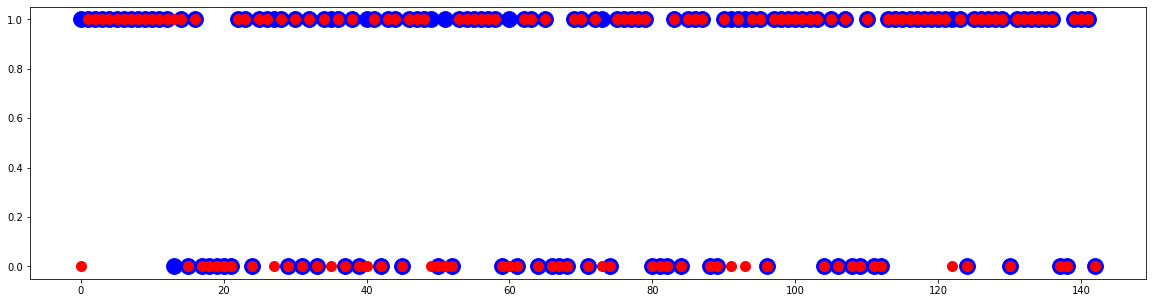

In [ ]:
def breastCancerTest():
    dataset = pd.read_csv("data.csv")
    dataset.replace('?', 0, inplace=True)
    X = dataset.iloc[:, 2:-1].values    
    y = dataset.iloc[:, 1].values
    print(dataset)
    y_new = []
    for i in range(len(y)):
        if y[i] == 'M':
            y_new.append(0)
        else:
            y_new.append(1)
    y_new = np.array(y_new)

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size = 0.25, random_state = 0)
    
    NB = NaiveBayesClassifier()
    NB.fit(X_train, y_train)
    
    y_pred = NB.predict(X_test, radius=200)
    
    print("Accuracy for Naive Bayes Classifier:", accuracy(y_test, y_pred), "percent")
    datasize = []
    for i in range(len(y_pred)):
      datasize.append(i)
    plt.figure(figsize=(20,5))
    plt.scatter(datasize,y_pred,c='blue',s=250)
    plt.scatter(datasize,y_test,c='red',s=100)
    
    plt.show 
breastCancerTest() 